#### **Semantic Segmentation with U-Net**

What is Semantic Segmentation?
- In Semantic Segmentation, there is no distinction between different instances of the same class.
- It is useful for medical imaging or satellite image analysis.

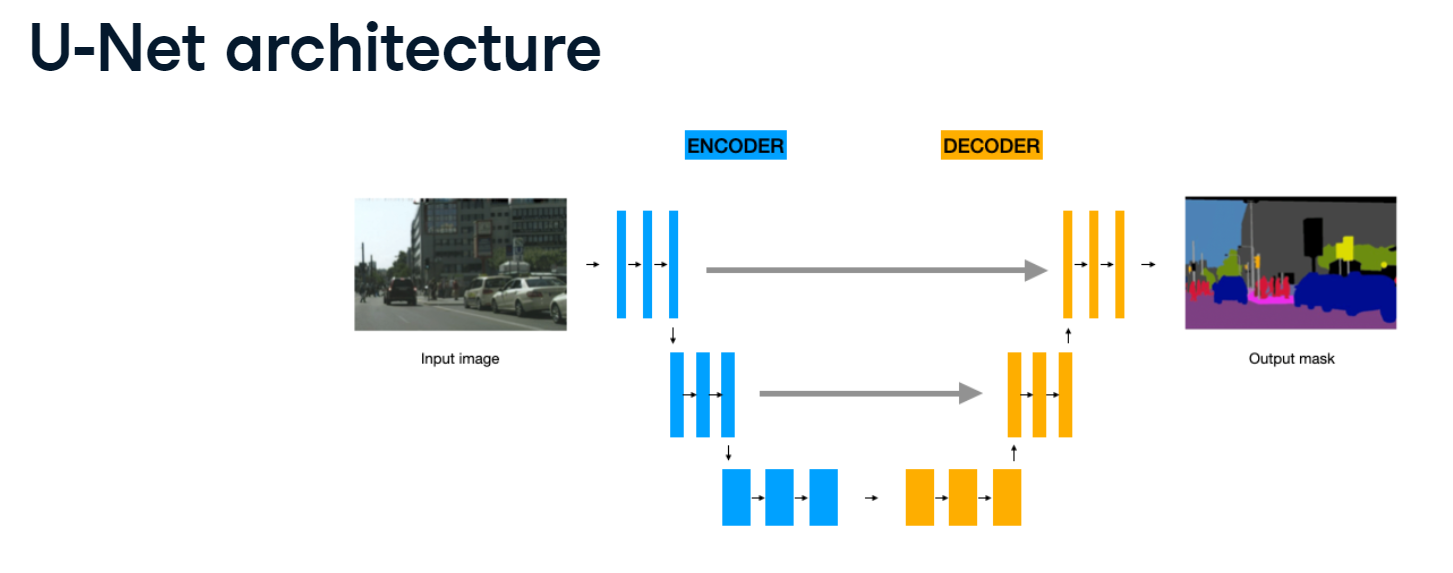

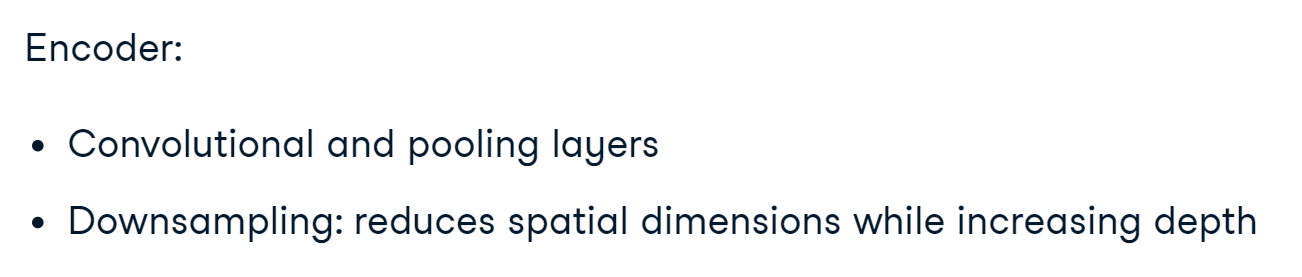

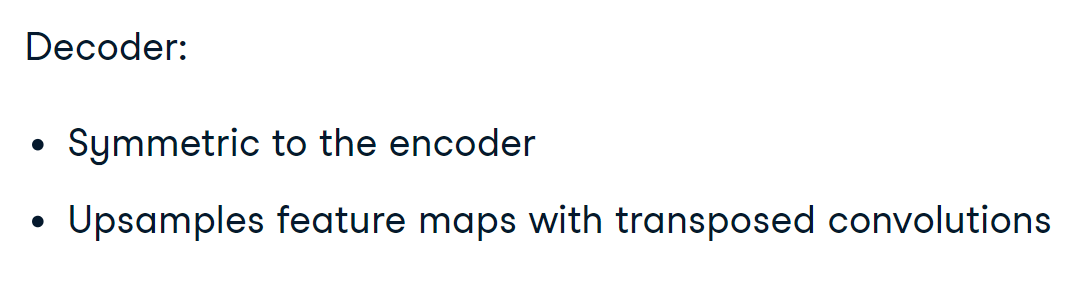

Skip connections

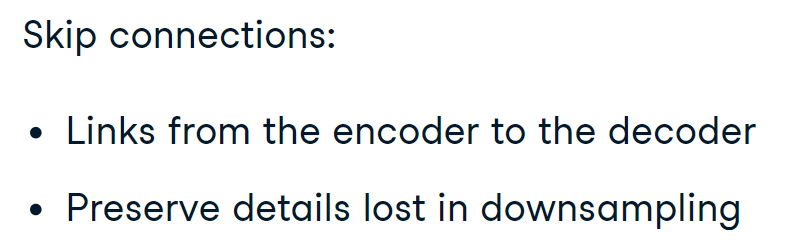

Decoder block (upsampling)

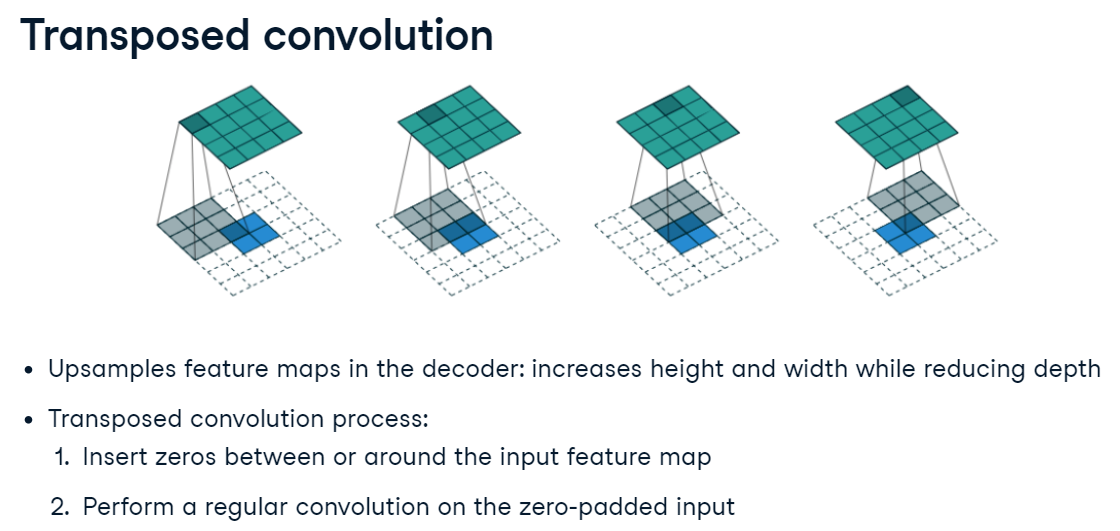

#### **Transposed Convolution in PyTorch**

In [ ]:
import torch
import torch.nn as nn

upsample = nn.ConvTranspose2d(
    in_channels = in_channels,
    out_channels = out_channels,
    kernel_size = 2,    # we use kernel_size = 2 while upsampling in U-net architecture 
    stride = 2,         # we use stride = 2 while upsampling in U-net architecture 
)

#### **Building a U-Net**

In [ ]:
class UNet(nn.module):
    def __init__(self, in_channels, out_channels):
        super(UNet, self).__init__()
        
        # Encoder Block
        self.enc1 = self.conv_block(in_channels, 64)
        self.enc2 = self.conv_block(64, 128)
        self.enc3 = self.conv_block(128, 256)    
        self.enc4 = self.conv_block(256, 512)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)    
    
        # Decoder Block
        # Upsampling layers (transposed convolutions)
        self.upconv3 = nn.ConvTranspose2d(512, 256, kernel_siz=2, stride=2)
        self.upconv2 = nn.ConvTranspose2d(256, 128, kernel_siz=2, stride=2)
        self.upconv1 = nn.ConvTranspose2d(128, 64, kernel_siz=2, stride=2)
    
        # Decoder layers
        self.dec1 = self.conv_block(512, 256)
        self.dec2 = self.conv_block(256, 128)
        self.dec3 = self.conv_block(128, 64)
        self.out = nn.Conv2d(64, out_channels, kernel_size=1)
            
    def forward(self, x):
        x1 = self.enc1(x)
        x2 = self.enc2(self.pool(x1))
        x3 = self.enc3(self.pool(x2))
        x4 = self.enc4(self.pool(x3))

        x = self.upconv3(x4)
        x = torch.cat([x, x3], dim=1)   # dim can be understood as the index number. 
        x = self.dec1(x)
        
        x = self.upconv2(x)
        x = torch.cat([x, x2], dim=1)
        x = self.dec2(x)
        
        x = self.upconv1(x)
        x = torch.cat([x, x1], dim=1)
        x = self.dec3(x)
        
        return self.out(x)
        
    # Helper function
    def conv_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels),
            nn.ReLU(inplace=True)
        )

#### **Running Inference**

In [ ]:
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

model = UNet()
model.eval()

image = Image.open("car.jpg")
transform = transforms.Compose([transforms.ToTensor()])
image_tensor = transform(image).unsqueeze(0)

with torch.no_grad():
    prediction = model(image_tensor).squeeze(0)

plt.imshow(prediction[1, :, :])
plt.show()